In [2]:
import time
import json
from pymongo import MongoClient
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import pickle
import dill
import matplotlib.pyplot as plt

#import dash
import plotly
import plotly.graph_objs as go

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

username='datamanager'
password='airtransportationrulez'
url = 'mongodb://%s:%s@167.99.24.166:2700/datamanager'
mongo_client_fs = MongoClient(url % (username, password))
db = mongo_client_fs['datamanager']

In [3]:
# Create a dataframe for the flight status
def query_flight_statuses_by_dates(airport_list, start_date, end_date, dateUtc=True):
    operational_times_fields_departure = ['publishedDeparture', 'scheduledGateDeparture', 'estimatedGateDeparture',
        'actualGateDeparture',  'flightPlanPlannedDeparture',  'estimatedRunwayDeparture', 'actualRunwayDeparture']

    operational_times_fields_arrival = ['publishedArrival', 'scheduledGateArrival', 'estimatedGateArrival',
        'actualGateArrival', 'flightPlanPlannedArrival', 'estimatedRunwayArrival', 'actualRunwayArrival']


    date_type = "dateUtc" if dateUtc else "dateLocal"

    end_date_parsed = datetime.strptime(end_date,"%Y-%m-%d") + timedelta(days=1)
    end_date_lt = end_date_parsed.strftime("%Y-%m-%d")

    print (end_date_lt)

    return db.flightStatuses.find (
        {
            "$and" : [
                {
                "$or" :
                    [ {"departureAirportFsCode" : {"$in" : airport_list}},
                        {"arrivalAirportFsCode": {"$in": airport_list}}
                    ]
                },
                {
                "$or" :
                    [ {"operationalTimes.{}.{}".format(dep, date_type) :
                             {"$gte" : start_date}
                      } for dep in operational_times_fields_departure
                    ]
                },
                {
                    "$or":
                        [ {"operationalTimes.{}.{}".format(arr, date_type):
                                 {"$lt": end_date_lt}
                          } for arr in operational_times_fields_arrival
                        ]
                }
            ]
        }
    )

flight_status_list = list(query_flight_statuses_by_dates(['LAX'],'2019-06-20','2019-06-20',dateUtc=False))
flight_status_dataframe = DataFrame(flight_status_list)
len(flight_status_dataframe)

2019-06-21


1801

In [4]:
xxxx = db.airlines.find()

In [5]:
type(xxxx)

pymongo.cursor.Cursor

In [7]:
airlines_list = list(xxxx)

In [8]:
x_dict = dict()
for i in airlines_list:
    key_name = i['fs']
    key_value = i['name']
    x_dict[key_name] = key_value

In [9]:
x_dict

{'02': 'Oceanic',
 '03': 'Bellview Airlines',
 '07': 'OzJet',
 '0A': 'Amber Air',
 '0B': 'Blue Air',
 '0C': 'Catoair',
 '0G': 'Ghadames Air',
 '0J': 'Premium Jet',
 '0K': 'Aircompany Kokshetau',
 '0P': 'Palau Asia Pacific Air',
 '0Q': 'Hydro - Quebec',
 '0V': 'VASCO',
 '0W': 'West Caribbean Costa Rica',
 '0Y': 'Yeti Airlines',
 '1A': 'AirNet Systems',
 '1B': 'British Airways Cargo',
 '1F': 'Forward Air',
 '1G': 'Eva Airways Cargo',
 '1H': 'Asiana Airways Cargo',
 '1I': 'NetJets Aviation',
 '1J': 'JAL Cargo',
 '1K': 'Korean Air Cargo',
 '1L': 'Dragonair Cargo',
 '1M': 'China Airlines Cargo',
 '1N': 'ANA Cargo',
 '1W*': 'World Air Leasing - Gambia',
 '1X': 'Branson Air Express',
 '22S': 'Air Carnival',
 '2A': 'Deutsche Bahn',
 '2B': 'Aerocondor',
 '2B*': 'Albawings',
 '2D': 'Dubrovnik Airline',
 '2D*': 'Eastern Airlines',
 '2E': 'Smokey Bay Air',
 '2F': 'Frontier Flying Service',
 '2F*': 'Afrinat International',
 '2G': 'CargoItalia',
 '2H': 'Amsterdam Airlines',
 '2H*': 'Thalys Internati

In [10]:
airlines_list

[{'_id': ObjectId('5c456047bfd552a81fb7a8b8'),
  'active': False,
  'category': 'I',
  'name': 'Oceanic',
  'fs': '02'},
 {'_id': ObjectId('5c456047bfd552a81fb7a8ba'),
  'active': False,
  'name': 'Bellview Airlines',
  'iata': 'O3',
  'category': 'I',
  'fs': '03'},
 {'_id': ObjectId('5c456047bfd552a81fb7a8bc'),
  'active': False,
  'name': 'OzJet',
  'iata': 'O7',
  'category': 'I',
  'fs': '07'},
 {'_id': ObjectId('5c456047bfd552a81fb7a8be'),
  'active': False,
  'category': 'A',
  'fs': '0A',
  'icao': 'GNT',
  'iata': '0A',
  'name': 'Amber Air'},
 {'_id': ObjectId('5c456047bfd552a81fb7a8c0'),
  'active': True,
  'category': 'I',
  'fs': '0B',
  'icao': 'BMS',
  'iata': '0B',
  'name': 'Blue Air'},
 {'_id': ObjectId('5c456047bfd552a81fb7a8c2'),
  'active': False,
  'category': 'A',
  'fs': '0C',
  'icao': 'IBL',
  'iata': '0C',
  'name': 'Catoair'},
 {'_id': ObjectId('5c456047bfd552a81fb7a8c4'),
  'active': True,
  'category': 'A',
  'fs': '0G',
  'icao': 'GHT',
  'iata': 'G6',
  

In [11]:
# Show top 5 rows in flight status dataframe
print(list(flight_status_dataframe['delays'].head()))

[{'departureRunwayDelayMinutes': 2}, {'departureRunwayDelayMinutes': 1}, {'arrivalRunwayDelayMinutes': 11, 'arrivalGateDelayMinutes': 8}, nan, {'departureRunwayDelayMinutes': 4}]


In [12]:
list(flight_status_dataframe.columns)

['_id',
 'airportResources',
 'arrivalAirportFsCode',
 'arrivalDate',
 'carrierFsCode',
 'codeshares',
 'delays',
 'departureAirportFsCode',
 'departureDate',
 'divertedAirportFsCode',
 'flightDurations',
 'flightEquipment',
 'flightId',
 'flightNumber',
 'flightStatusUpdates',
 'irregularOperations',
 'operatingCarrierFsCode',
 'operationalTimes',
 'primaryCarrierFsCode',
 'request_id',
 'schedule',
 'status']

In [13]:
# Generate a function for extracting dictionary key:value pairs in certain dictionary fields 
# into their own dataframe columns

def ExtractField(d,k):
    if not isinstance(d, dict):  # for some rows without a value, the entry is not a dictionary, 
        return None             #need to account for this to avoid error
    
    if k in d.keys():           #if the field I want to extract is in the cell, then the value for that field
        return d[k]
    else:
        return None

In [14]:
# Let's create a new dataframe to which we'll append the extracted columns
flight_status_dataframe_appended = flight_status_dataframe

In [15]:
# Append the airportResources columns

field_string = ''
field_keys_to_extract = []
field_string = 'airportResources'
x = field_string
field_keys_to_extract = ['departureTerminal','arrivalTerminal','departureGate',
                        'arrivalGate']

for i in field_keys_to_extract:
    flight_status_dataframe_appended[field_string + i] = flight_status_dataframe_appended[field_string].apply(lambda x: ExtractField(x,i))

In [16]:
# Append the arrivalDate

field_string = ''
field_keys_to_extract = []
field_string = 'arrivalDate'
x = field_string
field_keys_to_extract = ['dateUtc','dateLocal']

for i in field_keys_to_extract:
    flight_status_dataframe_appended[field_string + i] = flight_status_dataframe_appended[field_string].apply(lambda x: ExtractField(x,i))

In [17]:
# Append the departureDate

field_string = ''
field_keys_to_extract = []
field_string = 'departureDate'
x = field_string
field_keys_to_extract = ['dateUtc','dateLocal']

for i in field_keys_to_extract:
    flight_status_dataframe_appended[field_string + i] = flight_status_dataframe_appended[field_string].apply(lambda x: ExtractField(x,i))

In [18]:
# Add the delays columns

field_string = ''
field_keys_to_extract = []
field_string = 'delays'
x = field_string
field_keys_to_extract = ['arrivalGateDelayMinutes','departureGateDelayMinutes','arrivalRunwayDelayMinutes',
                        'departureRunwayDelayMinutes']

for i in field_keys_to_extract:
    flight_status_dataframe_appended[field_string + i] = flight_status_dataframe_appended[field_string].apply(lambda x: ExtractField(x,i))

In [19]:
# Add the flight status update columns

field_string = ''
field_keys_to_extract = []
field_string = 'flightStatusUpdates'
x = field_string
field_keys_to_extract = ['updatedAt']

for i in field_keys_to_extract:
    flight_status_dataframe_appended[field_string + i] = flight_status_dataframe_appended[field_string].apply(lambda x: ExtractField(x,i))


In [20]:
# Add the operationalTimes columns
field_string = ''
field_keys_to_extract = []
field_string = 'operationalTimes'
x = field_string
field_keys_to_extract = ['publishedDeparture','publishedArrival','scheduledGateDeparture','scheduledRunwayDeparture',
                        'estimatedGateDeparture','flightPlanPlannedDeparture','estimatedRunwayDeparture','actualRunwayDeparture',
                         'scheduledRunwayArrival','scheduledGateArrival','scheduledGateArrival','estimatedGateArrival',
                         'actualGateArrival','flightPlanPlannedArrival','estimatedRunwayArrival','actualRunwayArrival']

for i in field_keys_to_extract:
    flight_status_dataframe_appended[field_string + i] = flight_status_dataframe_appended[field_string].apply(lambda x: ExtractField(x,i))


In [21]:
# Add the flightDurations columns

field_string = ''
field_keys_to_extract = []
field_string = 'flightDurations'
x = field_string
field_keys_to_extract = ['scheduledTaxiInMinutes','scheduledTaxiOutMinutes','taxiInMinutes',
                        'taxiOutMinutes','scheduledAirMinutes','airMinutes','scheduledBlockMinutes',
                        'blockMinutes']

for i in field_keys_to_extract:
    flight_status_dataframe_appended[field_string + i] = flight_status_dataframe_appended[field_string].apply(lambda x: ExtractField(x,i))

In [22]:
dill.dump(flight_status_dataframe_appended,open('flight_df.pkd','wb'))

In [23]:
flight_status_dataframe_appended=dill.load(open('flight_df.pkd','rb'))

In [24]:
len(list(flight_status_dataframe_appended.index))

1801

In [25]:
flight_status_dataframe_appended.head()

,_id,airportResources,arrivalAirportFsCode,arrivalDate,carrierFsCode,codeshares,delays,departureAirportFsCode,departureDate,divertedAirportFsCode,...,operationalTimesestimatedRunwayArrival,operationalTimesactualRunwayArrival,flightDurationsscheduledTaxiInMinutes,flightDurationsscheduledTaxiOutMinutes,flightDurationstaxiInMinutes,flightDurationstaxiOutMinutes,flightDurationsscheduledAirMinutes,flightDurationsairMinutes,flightDurationsscheduledBlockMinutes,flightDurationsblockMinutes
0,5d0f556b0473a81fe3142518,"{'baggage': '6', 'departureTerminal': '2', 'ar...",ATL,"{'dateUtc': '2019-06-20T16:42:00.000Z', 'dateL...",DL,"[{'flightNumber': '3314', 'fsCode': 'AZ', 'rel...",{'departureRunwayDelayMinutes': 2},LAX,"{'dateUtc': '2019-06-20T12:20:00.000Z', 'dateL...",NaN,...,"{'dateUtc': '2019-06-20T16:27:00.000Z', 'dateL...","{'dateUtc': '2019-06-20T16:27:00.000Z', 'dateL...",5.0,19.0,6.0,21.0,238.0,226.0,262.0,253.0
1,5d0f556b0473a81fe314251a,"{'departureTerminal': '1', 'arrivalGate': 'C20...",ATL,"{'dateUtc': '2019-06-20T17:20:00.000Z', 'dateL...",WN,NaN,{'departureRunwayDelayMinutes': 1},LAX,"{'dateUtc': '2019-06-20T12:50:00.000Z', 'dateL...",NaN,...,"{'dateUtc': '2019-06-20T16:45:00.000Z', 'dateL...","{'dateUtc': '2019-06-20T16:45:00.000Z', 'dateL...",26.0,9.0,7.0,12.0,235.0,225.0,270.0,244.0
2,5d0f556b0473a81fe314251c,"{'departureTerminal': '5', 'arrivalGate': 'C9'...",BOS,"{'dateUtc': '2019-06-20T18:36:00.000Z', 'dateL...",B6,"[{'flightNumber': '6308', 'fsCode': 'EK', 'rel...","{'arrivalRunwayDelayMinutes': 11, 'arrivalGate...",LAX,"{'dateUtc': '2019-06-20T13:00:00.000Z', 'dateL...",NaN,...,"{'dateUtc': '2019-06-20T18:31:00.000Z', 'dateL...","{'dateUtc': '2019-06-20T18:31:00.000Z', 'dateL...",16.0,15.0,13.0,13.0,305.0,323.0,336.0,349.0
3,5d0f556b0473a81fe314251e,NaN,BRU,"{'dateUtc': '2019-06-20T17:50:00.000Z', 'dateL...",SQ,NaN,NaN,LAX,"{'dateUtc': '2019-06-20T07:10:00.000Z', 'dateL...",NaN,...,"{'dateUtc': '2019-06-20T17:11:00.000Z', 'dateL...","{'dateUtc': '2019-06-20T17:11:00.000Z', 'dateL...",NaN,NaN,4.0,NaN,NaN,607.0,640.0,NaN
4,5d0f556b0473a81fe3142520,"{'departureTerminal': '1', 'arrivalGate': 'B4'...",BWI,"{'dateUtc': '2019-06-20T17:30:00.000Z', 'dateL...",WN,NaN,{'departureRunwayDelayMinutes': 4},LAX,"{'dateUtc': '2019-06-20T12:30:00.000Z', 'dateL...",NaN,...,"{'dateUtc': '2019-06-20T17:22:00.000Z', 'dateL...","{'dateUtc': '2019-06-20T17:22:00.000Z', 'dateL...",8.0,10.0,5.0,14.0,282.0,278.0,300.0,297.0


In [26]:
flight_status_dataframe_appended.columns

Index(['_id', 'airportResources', 'arrivalAirportFsCode', 'arrivalDate',
       'carrierFsCode', 'codeshares', 'delays', 'departureAirportFsCode',
       'departureDate', 'divertedAirportFsCode', 'flightDurations',
       'flightEquipment', 'flightId', 'flightNumber', 'flightStatusUpdates',
       'irregularOperations', 'operatingCarrierFsCode', 'operationalTimes',
       'primaryCarrierFsCode', 'request_id', 'schedule', 'status',
       'airportResourcesdepartureTerminal', 'airportResourcesarrivalTerminal',
       'airportResourcesdepartureGate', 'airportResourcesarrivalGate',
       'arrivalDatedateUtc', 'arrivalDatedateLocal', 'departureDatedateUtc',
       'departureDatedateLocal', 'delaysarrivalGateDelayMinutes',
       'delaysdepartureGateDelayMinutes', 'delaysarrivalRunwayDelayMinutes',
       'delaysdepartureRunwayDelayMinutes', 'flightStatusUpdatesupdatedAt',
       'operationalTimespublishedDeparture',
       'operationalTimespublishedArrival',
       'operationalTimesschedul

In [19]:
dep_Term_avg_GateDelay = flight_status_dataframe_appended.groupby(['airportResourcesdepartureTerminal'])['delaysdepartureGateDelayMinutes'].mean()

In [20]:
terminal_names = flight_status_dataframe_appended.airportResourcesdepartureTerminal.unique()

In [21]:
len(terminal_names)

27

In [104]:
flight_status_dataframe_appended['airline_name'] = flight_status_dataframe_appended['carrierFsCode'].map(x_dict)
#df['D'] = df['U'].map(d)


In [105]:
flight_status_dataframe_appended[:2]

,_id,airportResources,arrivalAirportFsCode,arrivalDate,carrierFsCode,codeshares,delays,departureAirportFsCode,departureDate,divertedAirportFsCode,...,operationalTimesactualRunwayArrival,flightDurationsscheduledTaxiInMinutes,flightDurationsscheduledTaxiOutMinutes,flightDurationstaxiInMinutes,flightDurationstaxiOutMinutes,flightDurationsscheduledAirMinutes,flightDurationsairMinutes,flightDurationsscheduledBlockMinutes,flightDurationsblockMinutes,airline_name
0,5d0f556b0473a81fe3142518,"{'baggage': '6', 'departureTerminal': '2', 'ar...",ATL,"{'dateUtc': '2019-06-20T16:42:00.000Z', 'dateL...",DL,"[{'flightNumber': '3314', 'fsCode': 'AZ', 'rel...",{'departureRunwayDelayMinutes': 2},LAX,"{'dateUtc': '2019-06-20T12:20:00.000Z', 'dateL...",NaN,...,"{'dateUtc': '2019-06-20T16:27:00.000Z', 'dateL...",5.0,19.0,6.0,21.0,238.0,226.0,262.0,253.0,Delta Air Lines
1,5d0f556b0473a81fe314251a,"{'departureTerminal': '1', 'arrivalGate': 'C20...",ATL,"{'dateUtc': '2019-06-20T17:20:00.000Z', 'dateL...",WN,NaN,{'departureRunwayDelayMinutes': 1},LAX,"{'dateUtc': '2019-06-20T12:50:00.000Z', 'dateL...",NaN,...,"{'dateUtc': '2019-06-20T16:45:00.000Z', 'dateL...",26.0,9.0,7.0,12.0,235.0,225.0,270.0,244.0,Southwest Airlines


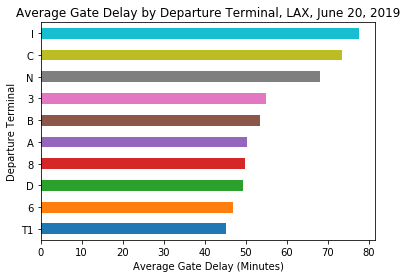

In [22]:
# Create a bar chart showing a metric X by group y
(flight_status_dataframe_appended.groupby(['airportResourcesdepartureTerminal'])
['delaysdepartureGateDelayMinutes'].mean().nlargest(10).sort_values().plot(kind='barh'))

plt.title('Average Gate Delay by Departure Terminal, LAX, June 20, 2019')
plt.xlabel('Average Gate Delay (Minutes)')
plt.ylabel('Departure Terminal')
plt.show()


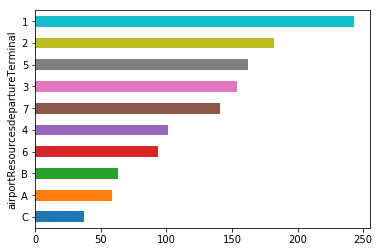

In [37]:
flight_status_dataframe_appended.groupby('airportResourcesdepartureTerminal')['airportResourcesdepartureTerminal'].count().nlargest(10).sort_values().plot(kind='barh')



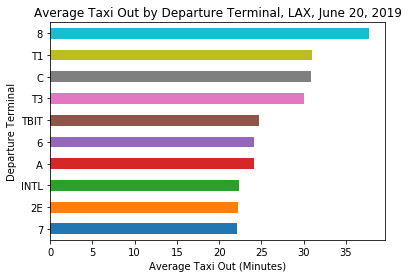

In [23]:
# Create a bar chart showing a metric X by group y
(flight_status_dataframe_appended.groupby(['airportResourcesdepartureTerminal'])
['flightDurationstaxiOutMinutes'].mean().nlargest(10).sort_values().plot(kind='barh'))

plt.title('Average Taxi Out by Departure Terminal, LAX, June 20, 2019')
plt.xlabel('Average Taxi Out (Minutes)')
plt.ylabel('Departure Terminal')
plt.show()

In [42]:
xxx = flight_status_dataframe_appended.groupby('airportResourcesdepartureTerminal')['flightDurationstaxiOutMinutes'].mean()

In [79]:
chart_values = (flight_status_dataframe_appended.groupby('carrierFsCode')
['delaysdepartureGateDelayMinutes'].mean().nlargest(10).sort_values())

#xxx = (flight_status_dataframe_appended.groupby(['carrierFsCode'])
#['delaysdepartureGateDelayMinutes'].mean().nlargest(10).sort_values().plot(kind='barh'))

# plt.title('Average Depature Gate Delay by Carrier, LAX, June 20, 2019')
# plt.xlabel('Average Gate Delay (Minutes)')
# plt.ylabel('Carrier')
# plt.show()



In [81]:
trace_close = go.Scatter(x=list(chart_values.index), y=list(chart_values), name = "Close", line = dict(color="#f44242"))

In [82]:
data = [trace_close]

In [83]:
layout = dict(title='Stock Chart',showlegend = False)

In [84]:
fig = dict(data = data, layout = layout)

In [86]:
import dash

ModuleNotFoundError: No module named 'dash'

In [85]:
app = dash.Dash()

NameError: name 'dash' is not defined

In [53]:
xxx = (flight_status_dataframe_appended.groupby(['carrierFsCode'])
['delaysdepartureGateDelayMinutes'].mean().nlargest(10).sort_values())
xxx.iplot()